In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

### Task 1: (5+5+5+5+5=25 pts)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 

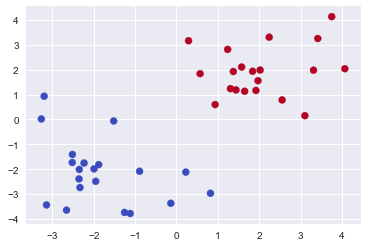

In [2]:
#Data
data1=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

### a. Report the separating hyperplane (line).

In [3]:
from sklearn import svm
# fit the model
clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

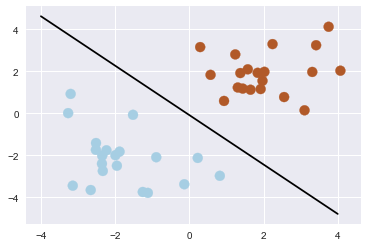

The hyperplane is x2 = -1.17689316087 * x1 - 0.0766504186458


In [4]:
w = clf.coef_[0]

a = -w[0] / w[1]
x1 = np.linspace(-4, 4)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# plot the line, the points, and the nearest vectors to the plane
plt.plot(x1, x2, 'k-')

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y, cmap=plt.cm.Paired, s=100)

plt.axis('tight')
plt.show()
print "The hyperplane is x2 = {} * x1 - {}".format(a,((clf.intercept_[0]) / w[1]))

### b. Calculate the upper and lower hyperplanes (lines) of the margin.

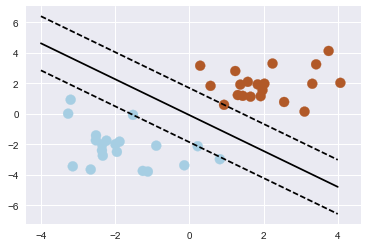

The upper hyperplane is x2 = -1.17689316087 * x1 + 1.69809110446
The lower hyperplane is x2 = -1.17689316087 * x1 - 1.8518077187


In [5]:
sv_d = clf.support_vectors_[0]
x2_down = a * x1 + (sv_d[1] - a * sv_d[0])
sv_u = clf.support_vectors_[-1]
x2_up = a * x1 + (sv_u[1] - a * sv_u[0])


plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y, cmap=plt.cm.Paired, s=100)

plt.axis('tight')
plt.show()
print "The upper hyperplane is x2 = {} * x1 + {}".format(a,(sv_u[1] - a * sv_u[0]))
print "The lower hyperplane is x2 = {} * x1 - {}".format(a,-(sv_d[1] - a * sv_d[0]))



### c. Compute the width of the margin.

In [6]:
#ref: http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print "Margin is {}".format(margin)

Margin is 1.14889967521


### d. List the support vectors.


support vectors are [[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]


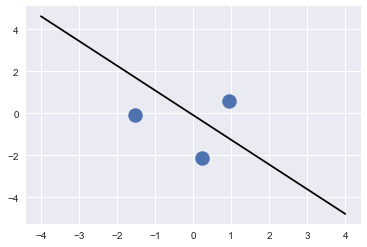

In [7]:
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200)
plt.plot(x1, x2, 'k-')
print "support vectors are {}".format(clf.support_vectors_)

### e. What would happen to the margin if you instead made the constant C very small?







In [8]:
clf_1 = svm.SVC(kernel='linear',C = 0.1)  
clf_1.fit(X, Y)

margin_1 = 1 / np.sqrt(np.sum(clf_1.coef_ ** 2))
if margin_1 == margin:
    print "New margin is {}, equal to the original one.".format(margin_1)
elif margin_1 < margin:
    print "New margin is {}, less than the original one.".format(margin_1)
else: 
    print "New margin is {}, larger than the original one.".format(margin_1)
        

New margin is 1.61157874672, larger than the original one.


## Task 2 (5+5+5+5=20 pts)






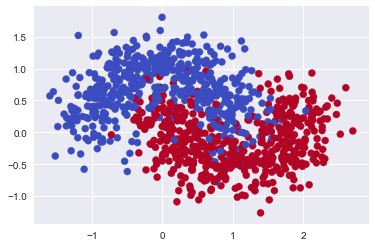

In [9]:
#Data 
data3=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));


#### (1) Train polynomial SVM over the training subset of the dataset provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.



In [10]:
#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


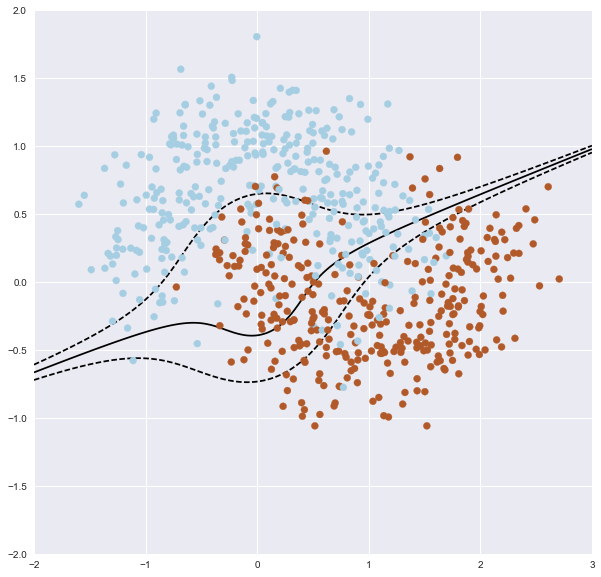

we successfully predict(IS) the 81.3432835821 percent of data
we successfully predict(OS) the 82.7272727273 percent of data


In [11]:
clf = svm.SVC(kernel='poly') 
clf.fit(X_train, Y_train)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()
plt.figure(figsize = (10,10))

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 80,
            facecolors='none', zorder=10)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = Y_train, zorder = 10, cmap = plt.cm.Paired)

plt.axis('tight')
x_min = -2
x_max = 3
y_min = -2
y_max = 2

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
print "we successfully predict(IS) the {} percent of data".format\
((Y_train == clf.predict(X_train)).sum()*100.0/len(Y_train))
print "we successfully predict(OS) the {} percent of data".format\
((Y_test == clf.predict(X_test)).sum()*100.0/len(Y_test))

### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

In [12]:
#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

#### (a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.



In [13]:
from sklearn.model_selection import GridSearchCV
import math

In [14]:
#Degree = 1
degree_1 = 1
param_grid_1 ={'kernel':["poly"], 'degree':[degree_1],
             'C':[math.exp(i) for i in np.linspace(-10,2 * degree_1,200)]}

In [15]:
rr = svm.SVC()
gr = GridSearchCV(rr, param_grid = param_grid_1)
rs = gr.fit(X_train_1,Y_train_1)
print rs.best_estimator_
right=1.0*(rs.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
print "we successfully(OS) predict the {} percent of data".format((right)*100)

SVC(C=0.165465101268, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
we successfully(OS) predict the 82.4324324324 percent of data


In [16]:
#Degree = 2
degree_2 = 2
param_grid_2 ={'kernel':["poly"], 'degree':[degree_2],
             'C':[math.exp(i) for i in np.linspace(-10,2 * degree_2,200)]}

In [17]:
gr = GridSearchCV(rr, param_grid = param_grid_2)
rs = gr.fit(X_train_1,Y_train_1)
print rs.best_estimator_
right=1.0*(rs.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
print "we successfully(OS) predict the {} percent of data".format((right)*100)

SVC(C=4.33766716242, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
we successfully(OS) predict the 73.8738738739 percent of data


In [18]:
#Degree = 3
degree_3 = 3
param_grid_3 ={'kernel':["poly"], 'degree':[degree_3],
             'C':[math.exp(i) for i in np.linspace(-10,2 * degree_3,200)]}

In [19]:
gr = GridSearchCV(rr, param_grid = param_grid_3)
rs = gr.fit(X_train_1,Y_train_1)
print rs.best_estimator_
right=1.0*(rs.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
print "we successfully(OS) predict the {} percent of data".format((right)*100)

SVC(C=1.13957258462, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
we successfully(OS) predict the 81.5315315315 percent of data


In [20]:
#Degree = 4
degree_4 = 4
param_grid_4 ={'kernel':["poly"], 'degree':[degree_4],
             'C':[math.exp(i) for i in np.linspace(-10,2 * degree_4,200)]}

In [21]:
gr = GridSearchCV(rr, param_grid = param_grid_4)
rs = gr.fit(X_train_1,Y_train_1)
print rs.best_estimator_
right=1.0*(rs.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
print "we successfully(OS) predict the {} percent of data".format((right)*100)

SVC(C=216.347177828, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
we successfully(OS) predict the 68.9189189189 percent of data



#### (b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.




/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


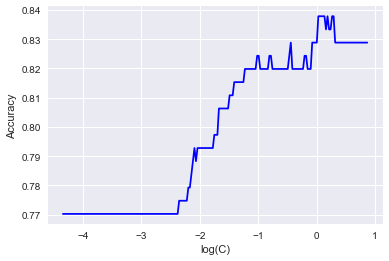

The optimal C we found for 1 degree is:1.36555069788 and the corresponding accuracy is:0.837837837838


In [22]:
#Degree = 1
C = np.linspace(-10,2 * degree_1,200)
C = [np.exp(i) for i in C]
OS_validation=[]

for c in C:
    clf = svm.SVC(kernel='poly', degree = degree_1,C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
    OS_validation.append(right)
temp=pd.DataFrame([C,OS_validation]).T
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
C_opt = temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

C = [math.log(y,10) for y in C] #for a better graph
plt.plot(C,OS_validation,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()

print("The optimal C we found for {} degree is:{} and the corresponding accuracy is:{}"\
      .format(degree_1, C_opt,temp.iloc[:,1].max())) 
# I choose the biggest one.



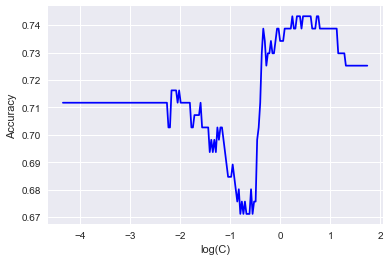

The optimal C we found for 2 degree is:3.27372882349 and the corresponding accuracy is:0.743243243243


In [23]:
#Degree = 2
C = np.linspace(-10,2 * degree_2,200)
C = [np.exp(i) for i in C]
OS_validation=[]

for c in C:
    clf = svm.SVC(kernel='poly', degree = degree_2, C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
    OS_validation.append(right)
temp=pd.DataFrame([C,OS_validation]).T
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

C = [math.log(y,10) for y in C] #for a better graph
plt.plot(C,OS_validation,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()

print("The optimal C we found for {} degree is:{} and the corresponding accuracy is:{}"\
      .format(degree_2, C_opt,temp.iloc[:,1].max())) 
# I choose the biggest one.



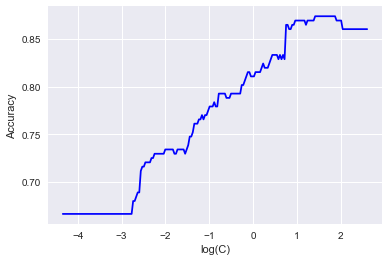

The optimal C we found for 3 degree is:46.0232051301 and the corresponding accuracy is:0.873873873874


In [24]:
#Degree = 3
C = np.linspace(-10,2 * degree_3,200)
C = [np.exp(i) for i in C]
OS_validation=[]

for c in C:
    clf = svm.SVC(kernel='poly', degree = degree_3,C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
    OS_validation.append(right)
temp = pd.DataFrame([C,OS_validation]).T
ind = len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

C = [math.log(y,10) for y in C] #for a better graph
plt.plot(C,OS_validation,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()

print("The optimal C we found for {} degree is:{} and the corresponding accuracy is:{}"\
      .format(degree_3, C_opt,temp.iloc[:,1].max())) 
# I choose the biggest one.



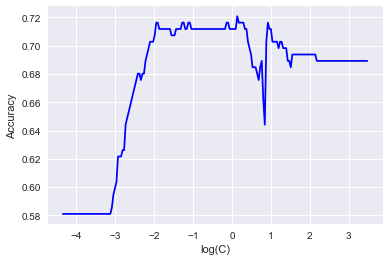

The optimal C we found for 4 degree is:1.36555069788 and the corresponding accuracy is:0.720720720721


In [25]:
#Degree = 4
C = np.linspace(-10,2 * degree_4,200)
C = [np.exp(i) for i in C]
OS_validation=[]

for c in C:
    clf = svm.SVC(kernel='poly', degree = degree_4,C = c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
    OS_validation.append(right)
temp=pd.DataFrame([C,OS_validation]).T
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

C = [math.log(y,10) for y in C] #for a better graph
plt.plot(C,OS_validation,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()

print("The optimal C we found for {} degree is:{} and the corresponding accuracy is:{}"\
      .format(degree_4, C_opt,temp.iloc[:,1].max())) 
# I choose the biggest one.



### From those graphs above, we can see that the optimal degree is 3, and regularization constant C according is 46. 

#### (c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 



In [26]:
clf = svm.SVC(kernel='poly',degree = 3, C = 46) 
clf.fit(X_train, Y_train)

right=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data".format((right)*100)

we successfully(OS) predict the 88.1818181818 percent of data


### Task 3 (5+5=10pts)

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports(1) or SUV(2)), the color of the car (red(1) or yellow(2)), and the origin of the car (domestic(1) or imported(2)). And the labels for the data are: stolen(1) and not(0). 



In [27]:
import numpy as np
import pandas as pd
y=[1,0,1,0,1,0,1,0,0,1]
X=[[1,1,1,2,2,2,2,2,1,1],[1,1,1,1,1,2,2,2,2,1],[1,1,1,1,2,2,2,1,2,2]]
data=[y]+X
data=pd.DataFrame(data).T
data.columns=['Stolen?','Color','Type','Origin']

In [28]:
data

,Stolen?,Color,Type,Origin
0,1,1,1,1
1,0,1,1,1
2,1,1,1,1
3,0,2,1,1
4,1,2,1,2
5,0,2,2,2
6,1,2,2,2
7,0,2,2,1
8,0,1,2,2
9,1,1,1,2


#### Questions:

a) Calculate the following sample probabilities:
P(Red|Stolen), P(SUV|Stolen), P(Domestic|Stolen), P(Red|Not Stolen) , P(SUV|Not Stolen), and P(Domestic|Not Stolen)



In [29]:
data_s = data[data['Stolen?'] == 1]
data_ns = data[data['Stolen?'] == 0]


In [30]:
P_s = 1.0 * len(data_s)/len(data)
P_ns = 1.0 * len(data_ns)/len(data)

In [31]:
#P(Red|Stolen)
data_rs = data_s[data_s.Color == 1]
P_RS = (1.00 * len(data_rs)) / (1.00 * len(data_s))
print "P(Red|Stolen) is {}".format(P_RS)

P(Red|Stolen) is 0.6


In [32]:
#P(SUV|Stolen)
data_ss = data_s[data_s.Type == 2]
P_SS = (1.00 * len(data_ss)) / (1.00 * len(data_s))
print "P(SUV|Stolen) is {}".format(P_SS)

P(SUV|Stolen) is 0.2


In [33]:
#P(Domestic|Stolen)
data_ds = data_s[data_s.Origin == 1]
P_DS = (1.00 * len(data_ds)) / (1.00 * len(data_s))
print "P(Domestic|Stolen) is {}".format(P_DS)

P(Domestic|Stolen) is 0.4


In [34]:
#P(Red|Not Stolen)
data_rns = data_ns[data_ns.Color == 1]
P_RNS = (1.00 * len(data_rns)) / (1.00 * len(data_ns))
print "P(Red|Not Stolen) is {}".format(P_RNS)

P(Red|Not Stolen) is 0.4


In [35]:
#P(SUV|Not Stolen)
data_sns = data_ns[data_ns.Type == 2]
P_SNS = (1.00 * len(data_sns)) / (1.00 * len(data_ns))
print "P(SUV|Not Stolen) is {}".format(P_SNS)

P(SUV|Not Stolen) is 0.6


In [36]:
#P(Domestic|Not Stolen)
data_dns = data_ns[data_ns.Origin == 1]
P_DNS = (1.00 * len(data_sns)) / (1.00 * len(data_ns))
print "P(Domestic|Not Stolen) is {}".format(P_DNS)

P(Domestic|Not Stolen) is 0.6


#### b) Suggest a classification for a red, domestic SUV - whether it will be stolen or not - using Naive Bayes classifier. 

#### Please perform all the necessary computations "by hands" rather than using python code.

In [37]:
P_rsd_s = P_RS * P_SS *P_DS
P_rsd_ns = P_RNS * P_SNS * P_DNS
P_s_rsd =  P_rsd_s * P_s / (P_rsd_s * P_s + P_rsd_ns * P_ns)
P_ns_rsd =  P_rsd_ns * P_ns / (P_rsd_s * P_s + P_rsd_ns * P_ns)
print "P(Stolen|Domestic,Red,SUV) is {}".format(P_s_rsd)
print "P(Not Stolen|Domestic,Red,SUV) is {}".format(P_ns_rsd)

P(Stolen|Domestic,Red,SUV) is 0.25
P(Not Stolen|Domestic,Red,SUV) is 0.75


In [38]:
if P_s_rsd < P_ns_rsd:
    print "A red, domestic SUV is not sotlen"
else:
    print "A red, domestic SUV is sotlen"

A red, domestic SUV is not sotlen


### Task 4 (10+10=20pts)
Consider a following Guassian Naive Bayes problem.
We use eight factors to predict if people have diabetes or not. The variabls are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)
#### ---------------------------------------------------------------------------------------------------------------------



In [39]:
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/dia_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/dia_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

#### Questions:

#### a)Train the classifier: use the training data to estimate prior probabilities $P(y=b)$ as well as the parameters (mean and standard deviation) of the sample distributions $P(x_i|y=b)$.



In [40]:
def trainNaiveBayes(trainData):
  #training Gausian Naive Bayes Classifier
  tY=trainData.loc[:,trainData.columns[0]]
  ind1=tY==0
  ind2=tY==1
  dp=pd.DataFrame(columns=trainData.columns, index=['mu1','sigma1','mu2','sigma2'])
  #estimate priors
  dp[trainData.columns[0]]['mu1']=1.0*sum(ind1)/len(trainData.index)
  dp[trainData.columns[0]]['mu2']=1.0*sum(ind2)/len(trainData.index)
  #estimate sample distribution paramters for p(xi|y=b)
  for i in trainData.columns[1:]:
    dp.loc['mu1',i]=(trainData[i][ind1]).mean()
    dp.loc['sigma1',i]=(trainData[i][ind1]).std()
    dp.loc['mu2',i]=(trainData[i][ind2]).mean()
    dp.loc['sigma2',i]=(trainData[i][ind2]).std()
  return dp

In [41]:
data_train=pd.DataFrame({'Y':y_train,'t_pre':X_train.t_pre,'glu':X_train.glu,'blood_p':X_train.blood_p,\
                    'triceps':X_train.triceps,'serum':X_train.serum,'b_m':X_train.b_m,\
                    'pedigree_f':X_train.pedigree_f,'age':X_train.age})

In [42]:
dp=trainNaiveBayes(data_train) 
dp

,Y,age,b_m,blood_p,glu,pedigree_f,serum,t_pre,triceps
mu1,0.699153,28.3939,31.7091,69.2061,111.467,0.468685,127.006,2.69091,27.2
sigma1,NaN,8.53736,6.33761,11.7133,24.6919,0.29175,91.4861,2.61006,10.4369
mu2,0.300847,35.7887,35.2239,74.5634,144.141,0.639042,209.211,4.07042,33.4789
sigma2,NaN,10.2635,6.25849,13.7993,30.6265,0.439042,126.921,3.51862,9.7627


#### b)Perform the classification for the test sample and compare your result to y_test and report the OS classification accuracy.

In [43]:
def classifyNaiveBayes(classData,dp):
  #classifying using trained Gausian Naive Bayes Classifier
  Y=classData.loc[:,classData.columns[0]]*0
  for j in classData.index:
    #start from the priors
    P1=dp[classData.columns[0]]['mu1'];
    P2=dp[classData.columns[0]]['mu2'];
    #multiply by conditional probability densities p(xi|y=b)
    for i in classData.columns[1:]:
        if dp[i]['sigma1']==0: #if sigma can not be defined (sample does not have variance)
            P1=P1*stats.norm.pdf(classData[i][j], loc=dp[i]['mu1'],scale=1) #pick up arbitrary sigma if undefined
        else:
            P1=P1*stats.norm.pdf(classData[i][j], loc=dp[i]['mu1'],scale=dp[i]['sigma1'])
        
        if dp[i]['sigma2']==0: #if sigma can not be defined (sample does not have variance)
            P2=P2*stats.norm.pdf(classData[i][j], loc=dp[i]['mu2'],scale=1) #pick up arbitrary sigma if undefined
        else:
            P2=P2*stats.norm.pdf(classData[i][j], loc=dp[i]['mu2'],scale=dp[i]['sigma2']) 
    Y[j]=int(P2>P1)
 

  return Y

In [44]:
data_test = pd.DataFrame({'Y':y_test,'t_pre':X_test.t_pre,'glu':X_test.glu,'blood_p':X_test.blood_p,\
                    'triceps':X_test.triceps,'serum':X_test.serum,'b_m':X_test.b_m,\
                    'pedigree_f':X_test.pedigree_f,'age':X_test.age})

In [45]:
C = classifyNaiveBayes(data_test, dp) #classify test set

In [46]:
#classification accuracy (over test set)
right = 100.0*sum(C == y_test)/len(C)
print "we successfully(OS) predict the {} percent of data".format(right)

we successfully(OS) predict the 79.1139240506 percent of data


### Task 5 (10+15=25 pts)
We have an artificial data set split, while the training set contains both - labeled (Label_train) and unlabeled (Unlabel) data. Column 'y' is the label, and columns '0','1','2' are categorical variables.



In [47]:
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_train.csv")
y_Label_train=data_train.iloc[:,1] 
X_Label_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_test.csv")
y_Label_test=data_test.iloc[:,1]
X_Label_test=data_test.iloc[:,2:]

data_Unlabel=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_Unlabel.csv")
X_Unlabel=data_Unlabel.iloc[:,1:]

#### Questions:

#### a) Use the labeled part data_train to predict the labels of X_Label_test, and report the classification accuracy.



In [48]:
def trainNaiveBayesDiscrete(trainData):
  #training discrete Naive Bayes Classifier
  tY=trainData.loc[:,trainData.columns[0]]
  m=max([trainData[j][i] for j in trainData.columns[1:] for i in trainData.index]) #maximal number of classes in each feature of a training set
  #create output data structure for the probabilities - same column labels, rows correspond to values of x and there are two arrays like that for different b
  dp=[pd.DataFrame(columns=trainData.columns, index=range(1,m+1)), pd.DataFrame(columns=trainData.columns, index=range(1,m+1))]
  #split the training data between two labels
  ind1=tY==0
  ind2=tY==1
  #estimate P(y=b)  
  dp[0][trainData.columns[0]][1]=1.0*ind1.sum()/len(trainData.index)
  dp[1][trainData.columns[0]][1]=1.0*ind2.sum()/len(trainData.index)
  #estimate conditional probabilities P(x|y=b)
  for j in trainData.columns[1:]:
    for i in range(1,m+1):
        dp[0].loc[i,j]=1.0*(trainData[j][ind1]==i).sum()/ind1.sum();
        dp[1].loc[i,j]=1.0*(trainData[j][ind2]==i).sum()/ind2.sum();
  return dp

In [49]:
def classifyNaiveBayesDiscrete(classData,dp):
  #classifying using trained discrete Naive Bayes Classifier
  Y=classData[classData.columns[0]]*0 #initialize the empty array 
  for i in classData.index: #for al records to classify
    #start with the priors
    P1=dp[0][classData.columns[0]][1]; 
    P2=dp[1][classData.columns[0]][1];
    #and multiply them by the corresponding conditional probabilities P(x_i|y=b)
    for j in classData.columns[1:]:
      P1=P1*dp[0][j][classData[j][i]]
      P2=P2*dp[1][j][classData[j][i]]
    Y[i]=int(P2>P1) #finally for each record decide which P(y|x) is higher and choose the label
  return Y

In [50]:
trainData = pd.concat([y_Label_train, X_Label_train],axis=1)
dp = trainNaiveBayesDiscrete(trainData)

In [51]:
testdata = pd.concat([y_Label_test,X_Label_test],axis=1)
C = classifyNaiveBayesDiscrete(testdata,dp)

In [52]:
acc = format(100.0*sum(C == y_Label_test)/len(y_Label_test))
print "We correctly classified {0} percents of y_Label based on the labeled data only".format(acc)     

We correctly classified 63.8888888889 percents of y_Label based on the labeled data only


#### b) Improve the classification by using the unlabeled data data_Unlabel and the EM algorithm to predict labels of X_Label_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use any packages you prefer). 

In [53]:
import math
def EM(X_Label,y_Label,X_Unlabel,dp):
  t = 0  
  haslabels=len(y_Label)>0

  while True:
    t = t + 1

    classData=X_Unlabel
    # Now we want to calculate P(y=1|x) and P(y=2|x) for all observations xj. (these are bunch of scalars)
    # we need this to calculate new dp. Basically speaking, for every new iteration we need a new dp.

    #for y=1 and y=2

    p_x_1=[] #unnormalized P(y=1|x)
    p_x_2=[] #unnormalized P(y=2|x)
    cols=dp[0].columns

    for i in classData.index:
        P1=dp[0][cols[0]][1];
        P2=dp[1][cols[0]][1];
        for j in classData.columns:
            P1=P1*dp[0][j][classData[j][i]]
            P2=P2*dp[1][j][classData[j][i]]
        p_x_1.append(P1)
        p_x_2.append(P2)
    
 
    #Rescale p_x_1 and p_x_2:
    summ=np.asarray(p_x_1)+np.asarray(p_x_2)
    p_x_1_s=np.asarray(p_x_1)/summ
    p_x_2_s=np.asarray(p_x_2)/summ
    inds_1 = np.where(np.isnan(p_x_1_s))
    inds_2 = np.where(np.isnan(p_x_2_s))
    p_x_1_s[inds_1]=0.5
    p_x_2_s[inds_2]=0.5
    #Now let's calculate P(y=1) and P(y=2)
    p_1=p_x_1_s.sum()/len(p_x_1_s)
    p_2=p_x_2_s.sum()/len(p_x_2_s)


    #Now let's calculate the probability distribution of P(xi|y=1) and P(xi|y=2)
    
    m=max([classData[j][i] for j in classData.columns for i in classData.index]) #maximal number of classes in each feature of a training set

    #create output data structure for the probabilities - new iteration
    
    dp1=[pd.DataFrame(columns=cols, index=range(1,m+1)), pd.DataFrame(columns=cols, index=range(1,m+1))]

    #P(y=b)  
    dp1[0][cols[0]][1]=p_1
    dp1[1][cols[0]][1]=p_2


    #estimate conditional probabilities P(x|y=b) -do we add labeled data to fit?

    temp=np.concatenate((np.asmatrix(X_Unlabel),np.asarray(pd.DataFrame(p_x_1_s)),np.asarray(pd.DataFrame(p_x_2_s))),
                        axis=1)
    temp=pd.DataFrame(temp)
    if haslabels:
        temp_l=np.concatenate((np.asmatrix(X_Label),np.asmatrix(1*(y_Label==0)).transpose(),np.asmatrix(1*(y_Label==1)).transpose()),axis=1)
        temp_l=pd.DataFrame(temp_l)
        pd.concat([temp,temp_l])
   

    for j in range(1,len(dp[0].T)):
        for i in range(len(dp[0])):

            dp1[0].iloc[i,j]=temp[temp.iloc[:,j-1]==i+1].iloc[:,-2].sum()/temp.iloc[:,-2].sum()
            dp1[1].iloc[i,j]=temp[temp.iloc[:,j-1]==i+1].iloc[:,-1].sum()/temp.iloc[:,-1].sum()
 
        ############################################################################################
    # Now we use dp to decide whether to continue our iterations
    if (((dp1[0]-dp[0])**2).sum()).sum()+(((dp1[1]-dp[1])**2).sum()).sum()<0.001: #if dp does not change much
        break
    else: 
        dp=dp1  #save new dp and perform next iteration

        
    ###############################################################################################
        #Calculate the log-likelihood
        
        L=0
        
        for i in classData.index:
            P1=dp[0][cols[0]][1];
            P2=dp[1][cols[0]][1];
            for j in classData.columns:
                P1=P1*dp[0][j][classData[j][i]]
                P2=P2*dp[1][j][classData[j][i]]
            temp=math.log(P1+P2)
            L=L+temp
        if haslabels:    
          for i in X_Label.index:
            yi=y_Label[i]
            P=dp[yi][cols[0]][1];
            for j in X_Label.columns:
                P=P*dp[yi][j][X_Label[j][i]]
            L=L+math.log(P)
        
        print "Iteration {0}: log maximum liklihood = {1}".format(t,L)    
    
  return dp




In [54]:
#perform EM estimation for theta
dpEM=EM(X_Label_train,y_Label_train,X_Unlabel,dp)
#OS test
C = classifyNaiveBayesDiscrete(testdata,dpEM) #classify test data with a new theta given by EM
acc = 100.0*sum(C == y_Label_test)/len(y_Label_test)
print "After EM we correctly classified {0} percents of the y_Label.".format(acc)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide


Iteration 1: log maximum liklihood = -590.452072842
Iteration 2: log maximum liklihood = -572.346722303
Iteration 3: log maximum liklihood = -559.190769042
Iteration 4: log maximum liklihood = -556.633109435
Iteration 5: log maximum liklihood = -556.067798435
After EM we correctly classified 94.4444444444 percents of the y_Label.
